# ML - Fall 2023 - Practical Homework

## Practical Homework 6 - KMeans and PCA

Student Name: Ali Aghayari

Student Number: 400104715

# Phase 0: Introduction

**In this assignment, you will develop K-means and PCA algorithm to perform data segmentation. The dataset contains behavioral variables of customers such as Balance, Purchases, etc. Your task is to make a model to segment the same customers into the clusters.**

In [1]:
# essential packages 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# add any other packages that you may need here

In [2]:
!wget -O https://www.dropbox.com/scl/fi/vcejtazdshv8dnhbnfxc7/dataset.csv?rlkey=zauavuzjf5jzmdoqtorkmrkzk&dl=1

# Phase 1: Explore

## Sec 1: Load and Explore the given dataset (P1-Sec1: 25 Points)

Load the dataset and display the first 10 rows of dataset. **(P1-1-1: 2 points)**

In [3]:
DF = pd.read_csv("/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv")
DF.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Print the column names and number of data samples. **(P1-1-2: 1 points)**

In [4]:
print("column names : ",DF.columns)
print("num of samples : ",len(DF))

column names :  Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
num of samples :  8950


Identify the columns that contain nan values. **(P1-1-3: 2 points)**

In [5]:
print(DF.columns[DF.isnull().sum() > 0])

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')


Fill the nan values with the median of each column. **(P1-1-4: 2 points)**

In [6]:
DF['MINIMUM_PAYMENTS'] = DF['MINIMUM_PAYMENTS'].fillna(DF['MINIMUM_PAYMENTS'].median())
DF['CREDIT_LIMIT'] = DF['CREDIT_LIMIT'].fillna(DF['CREDIT_LIMIT'].mode().iloc[0])

DF.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Find the max, min, and average of each column with numerical data. **(P1-1-5: 2 points)**

In [7]:
DF.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Plot the Histogram of each column with numerical data. Also, show the median and average value of each column in plot. **(P1-1-6: 6 points)**

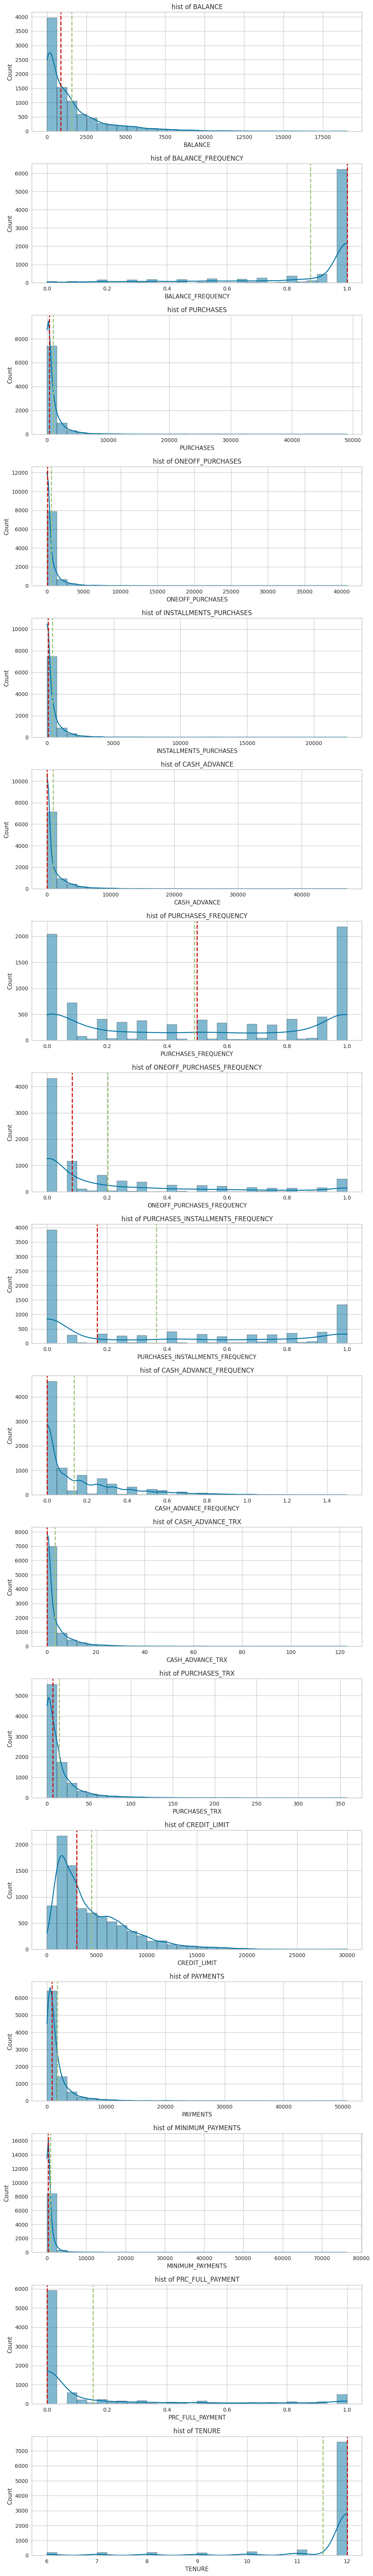

In [8]:
numeric_c = DF.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numeric_c), ncols=1, figsize=(10, 4 * len(numeric_c)))

for i, col in enumerate(numeric_c):
    sns.histplot(DF[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'hist of {col}')
    axes[i].legend()
    axes[i].axvline(DF[col].median(), color='r', linestyle='dashed', linewidth=2, label=f'Median: {DF[col].median():.2f}')
    axes[i].axvline(DF[col].mean(), color='g', linestyle='dashed', linewidth=2, label=f'Mean: {DF[col].mean():.2f}')

plt.tight_layout()
plt.show()

Display the box plot for each numerical column. **(P1-1-7: 5 points)**

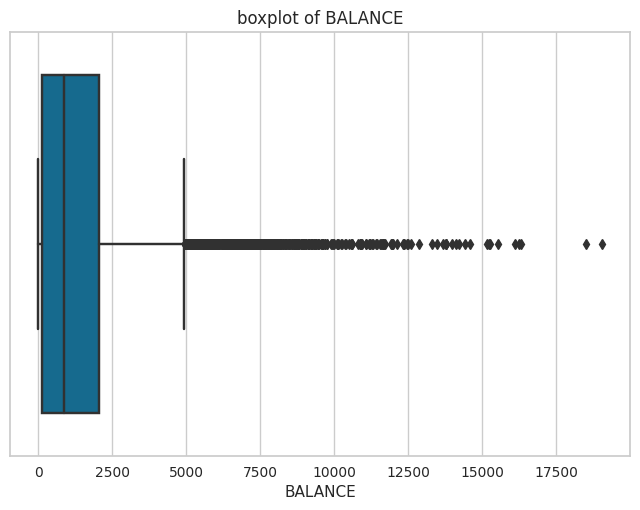

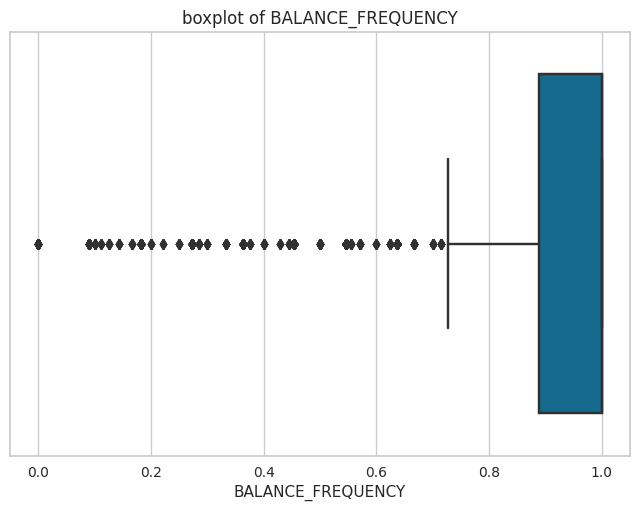

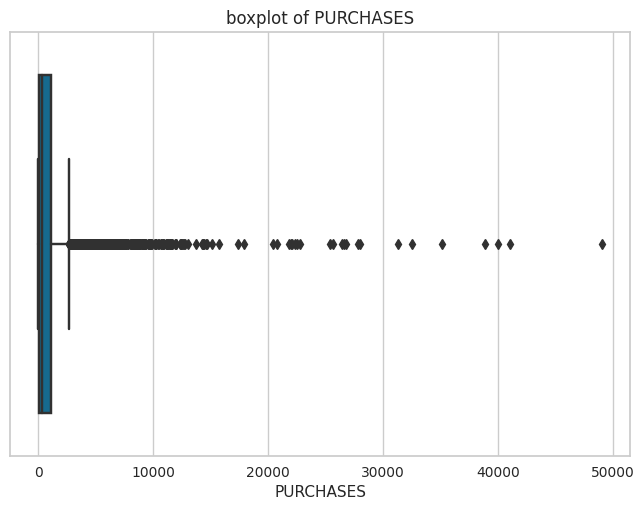

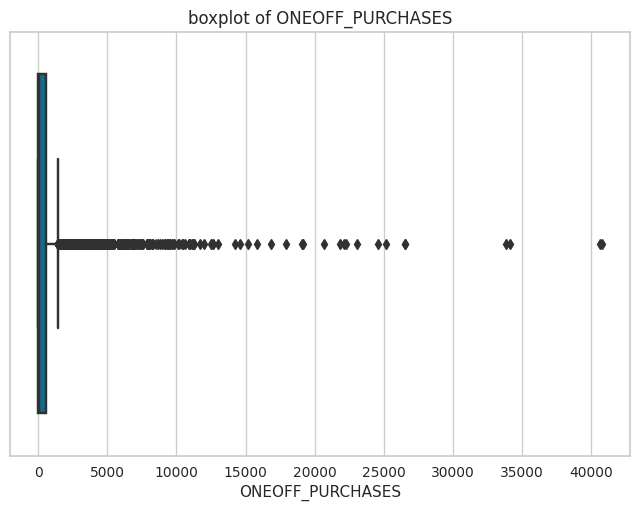

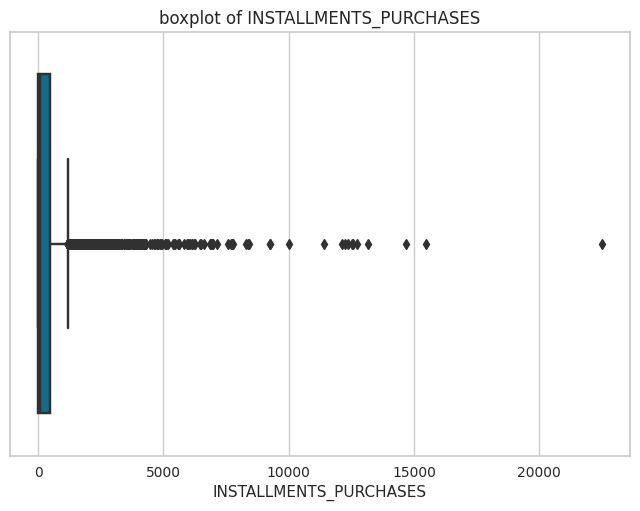

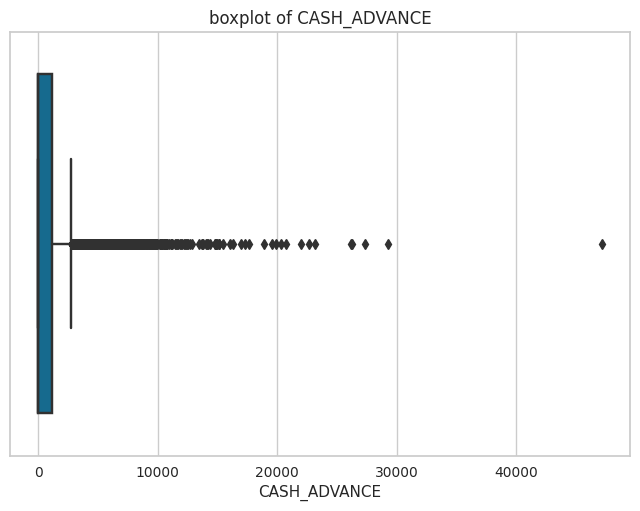

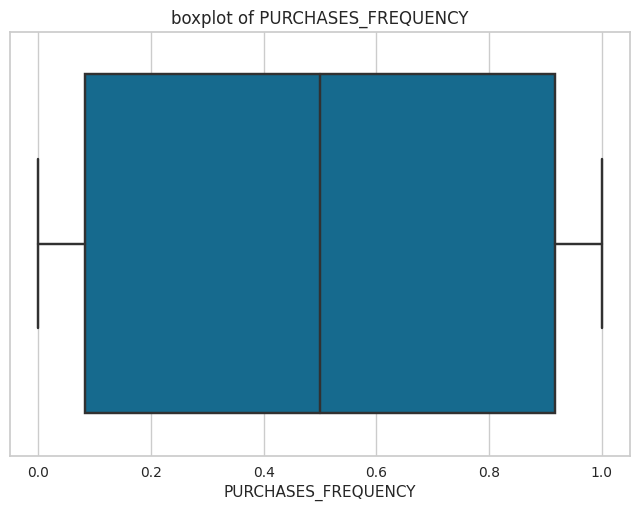

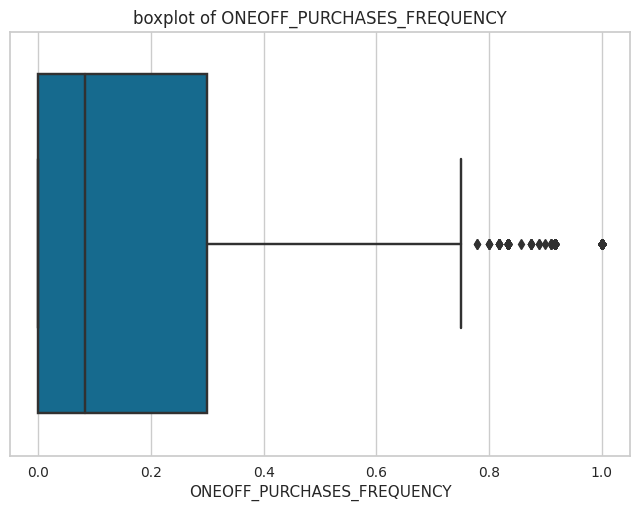

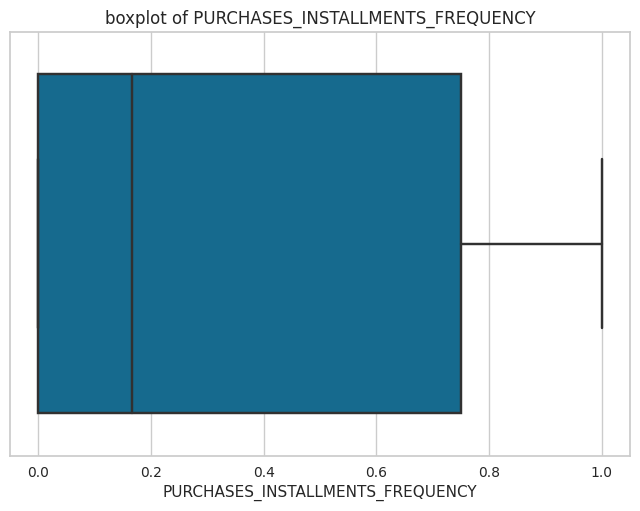

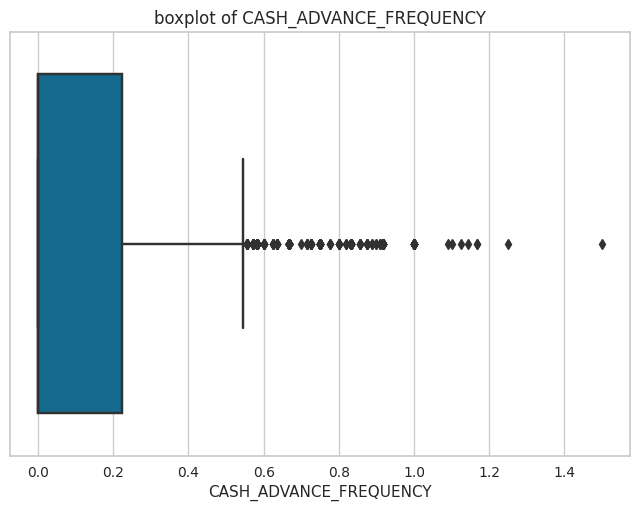

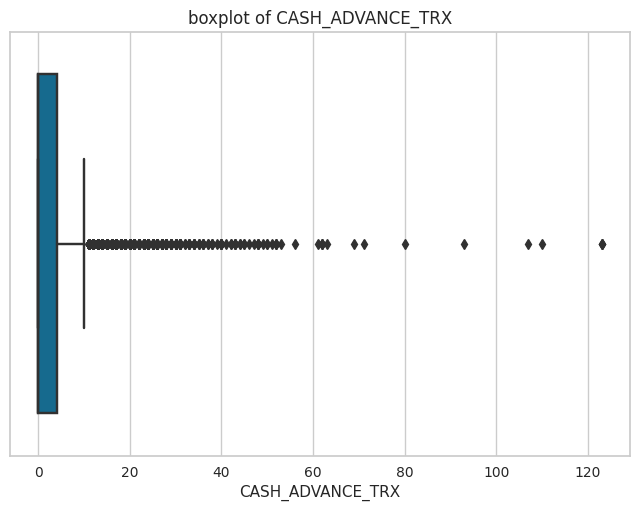

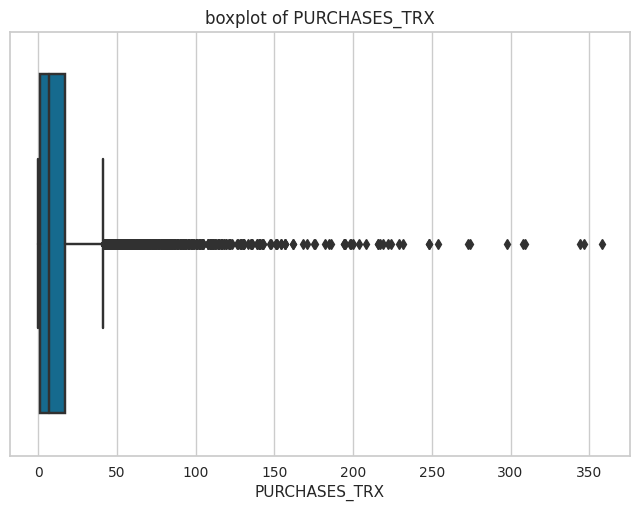

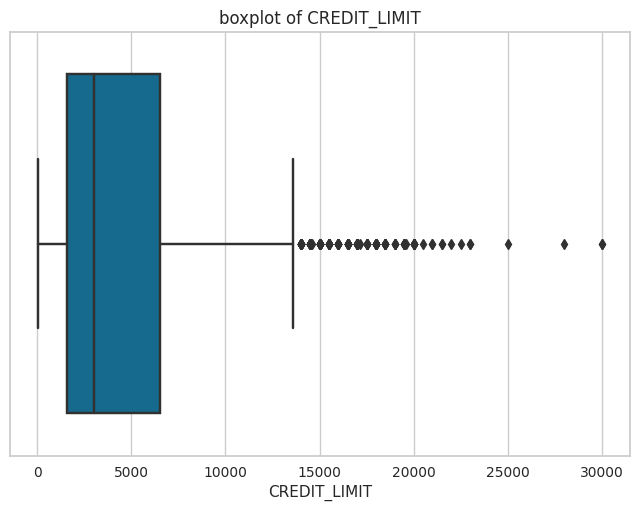

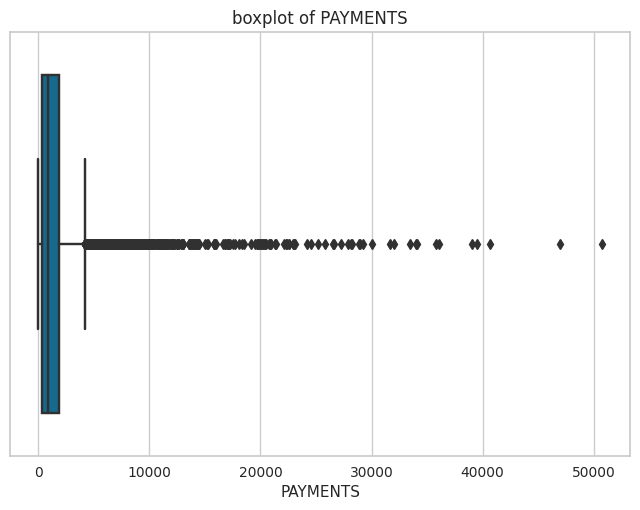

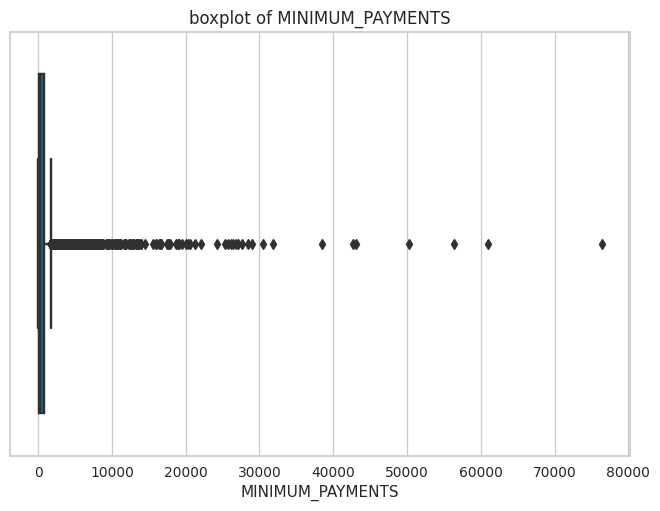

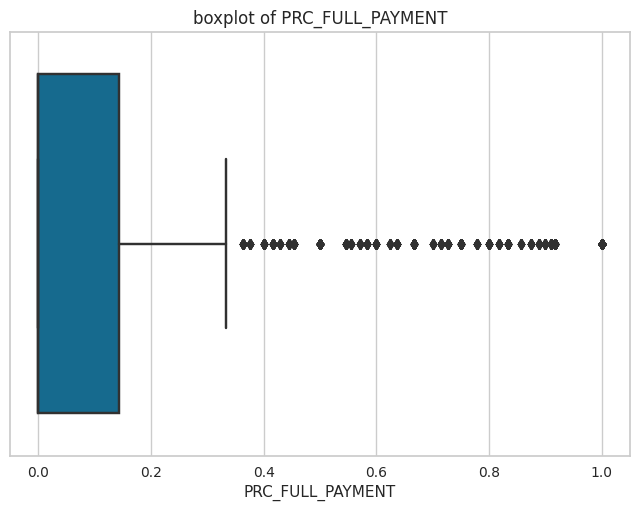

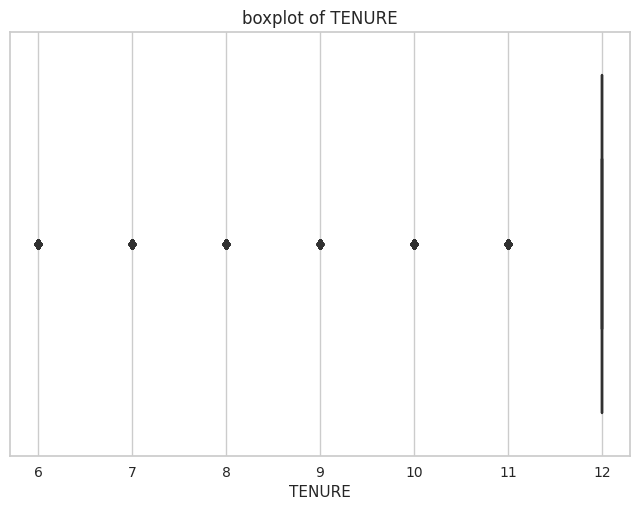

In [9]:
for i, col in enumerate(numeric_c):
    sns.boxplot(x=DF[col])
    plt.title(f'boxplot of {col}')
    plt.show()

Show the correlation between columns by plotting the heatmap of correlation coefficients. **(P1-1-8: 5 points)**

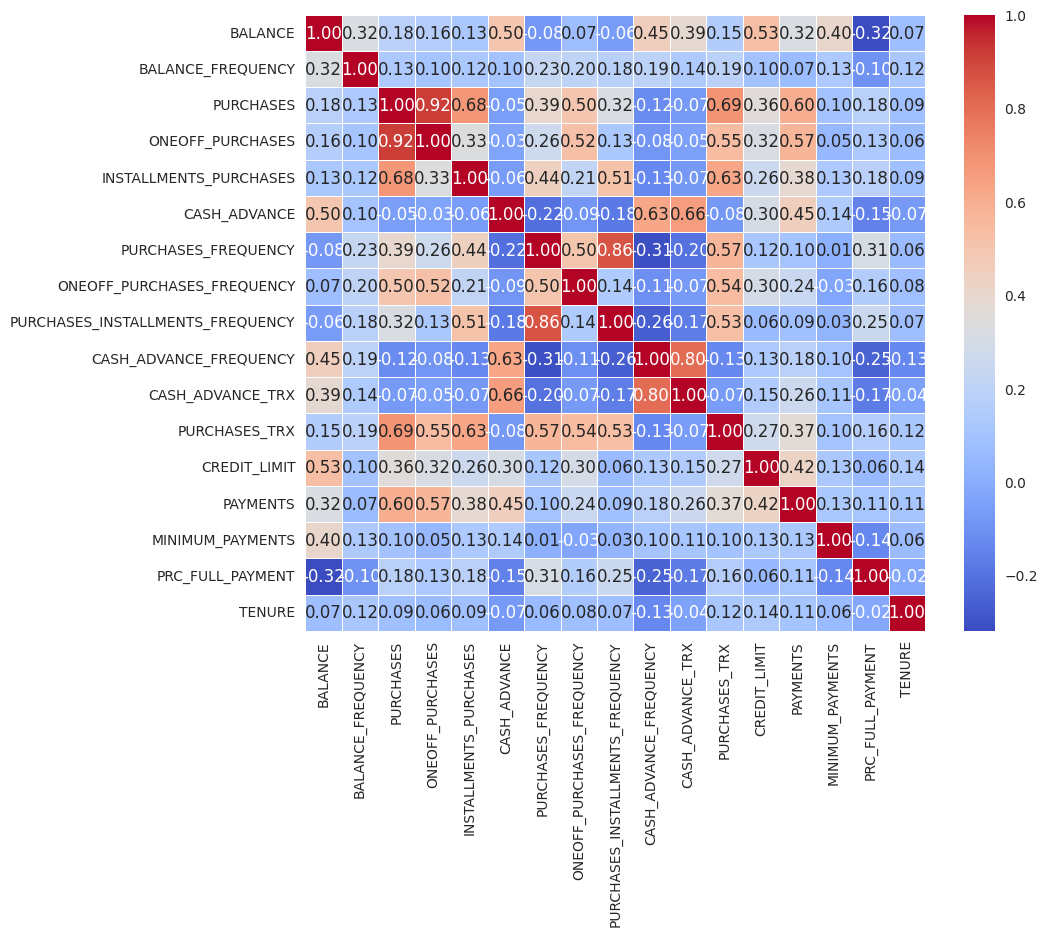

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(DF[numeric_c].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

# Phase 2: Preprocessing

## Sec 1: Preprocess the data **(P2-Sec1: 15 Points)**

drop the 'CUST_ID' column. **(P2-1-1: 2 points)**

In [11]:
DF = DF.drop('CUST_ID', axis=1)

Check for duplicated rows. If there is any duplicated row, remove them. **(P2-1-2: 6 points)**

In [12]:
print("num of duplicates : ",DF.duplicated().sum())
DF = DF.drop_duplicates()

num of duplicates :  0


Normalize the values of each column. **(P2-1-3: 7 points)**

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
DF = pd.DataFrame(scaler.fit_transform(DF), columns=DF.columns)

DF.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


# Phase 3: Modeling

## Sec 1: PCA and K-means with sklearn **(P3-Sec1: 40 Points)**

Use the `PCA` class from the `sklearn` library to reduce the dimensionality of the DataFrame. **(P3-1-1: 2 points)**

Follow [this link](https://www.youtube.com/watch?v=nEvKduLXFvk) to understand more about PCA (2 minutes).

In [14]:
pca = PCA()
pca.fit(DF)
PCA_DF = pd.DataFrame(pca.transform(DF), columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print(PCA_DF.shape)
PCA_DF.head()

# we dont know what value for pca is good enough

(8950, 17)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.482168,-0.097653,-0.046473,-0.058293,0.109979,-0.171672,0.018602,0.015998,0.013054,0.023037,-0.002375,-0.010616,0.004668,-0.001468,-0.005972,-0.003326,-6.762831e-06
1,-0.608575,-0.019376,0.082109,-0.218748,-0.099024,0.137029,0.047467,0.001856,0.005902,-0.002423,0.057578,-0.031662,-0.040711,-0.014840,0.002085,-0.050922,1.364976e-07
2,0.304508,0.920934,0.012204,0.160033,0.162325,-0.158527,-0.006547,-0.277868,0.008515,-0.016599,-0.003763,-0.012027,-0.006644,0.015668,-0.014880,0.008069,9.232142e-07
3,-0.588622,-0.005631,0.037055,0.004430,0.223708,0.065366,0.096132,-0.020103,-0.041066,-0.000194,-0.031229,0.029194,0.023905,-0.011105,-0.000902,-0.015514,-3.732299e-07
4,-0.554357,0.052978,-0.084182,-0.132827,-0.017081,-0.204461,0.056412,0.051725,0.019919,0.000595,0.014648,-0.010031,0.002796,-0.000456,-0.008328,0.004679,-3.426436e-06


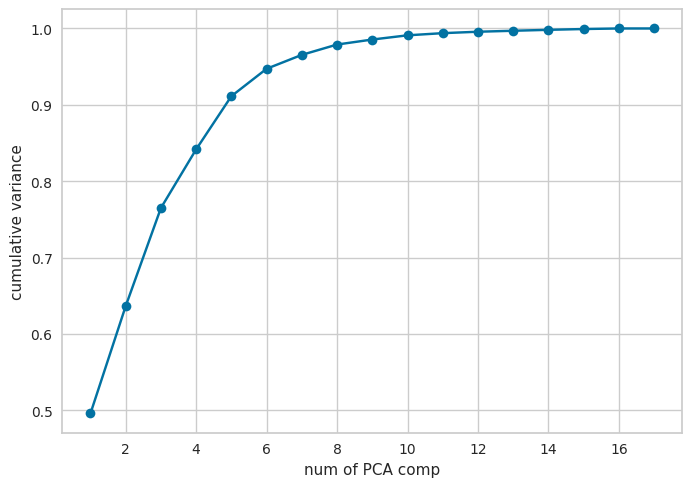

In [15]:
plt.plot(range(1, len(pca.explained_variance_ratio_.cumsum()) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('num of PCA comp')
plt.ylabel('cumulative variance')
plt.show()

# so we will use num_comp = 5 !

In [16]:
pca = PCA(5)
pca.fit(DF)
PCA_DF = pd.DataFrame(pca.transform(DF), columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print(PCA_DF.shape)
PCA_DF.head()

(8950, 5)


,PC1,PC2,PC3,PC4,PC5
0,-0.482168,-0.097653,-0.046473,-0.058293,0.109979
1,-0.608575,-0.019376,0.082109,-0.218748,-0.099024
2,0.304508,0.920934,0.012204,0.160033,0.162325
3,-0.588622,-0.005631,0.037055,0.004430,0.223708
4,-0.554357,0.052978,-0.084182,-0.132827,-0.017081


**Elbow Method Visualization** helps to determine the optimal number of clusters by visualizing the within-cluster sum of squares (WCSS) against the number of clusters.

Use the `plot_elbow_method function` to plot the number of clusters versus WCSS for both the main DataFrame and the one reduced using `PCA`. Then Discuss the choice of the number of components for PCA and clusters for K-means. **(P3-1-2: 10 points)**

In [17]:
def plot_elbow_method(X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

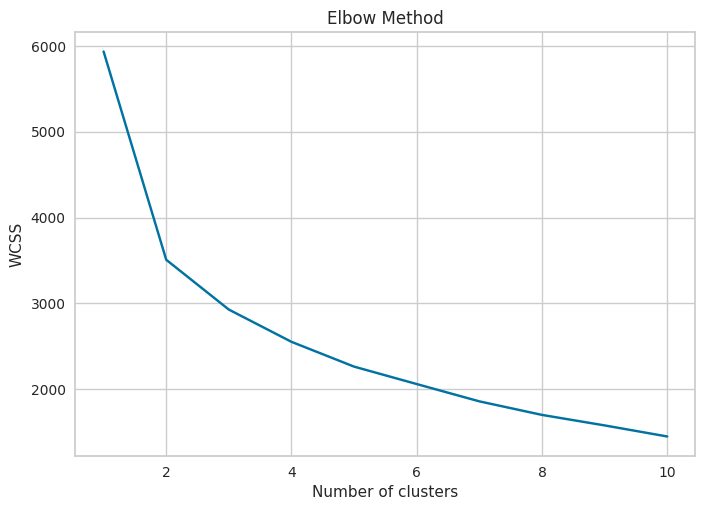

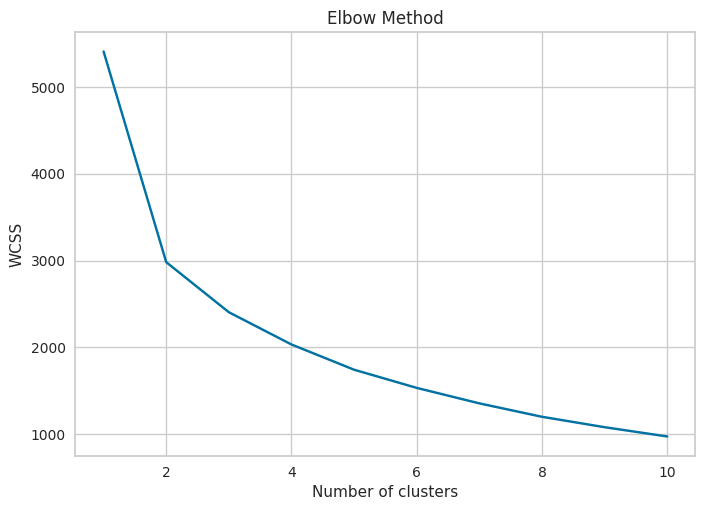

In [18]:
plot_elbow_method(DF)
plot_elbow_method(PCA_DF)

Use the `KMeans` class from the `sklearn.cluster` module to create clusters from the DataFrame that has been dimensionally reduced using `PCA`. **(P3-1-3: 3 points)**

Follow [this link](https://www.youtube.com/watch?v=R2e3Ls9H_fc) to understand more about KMeans (4 minutes).

In [19]:
num_clusters = 2
kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_pred = kmeans_pca.fit_predict(PCA_DF)

Complete the definition of the following class to implement PCA, which is capable of reducing the dimensionality. **(P3-1-4: 10 points)**

In [20]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        eigenvals, eigenvecs = np.linalg.eigh(np.cov(X.T))
        S_indice = np.argsort(eigenvals)[::-1]
        ST_eigenvecs = eigenvecs.T[S_indice]
        self.components = ST_eigenvecs[:self.n_components]

    def transform(self, X):
        return np.dot(X, self.components.T)

Complete defining the class below to implement `KMeans`, an algorithm designed for clustering. **(P3-1-5: 15 points)**

In [21]:
class CustomKMeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None

    def fit_predict(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(10000):
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)
            new_cent = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
            if np.allclose(new_cent, self.centroids): break
            self.centroids = new_cent
        return labels


## Sec 2: Fitting implemented Kmeans **(P3-Sec2: 5 Points)**

Use your implemented `CustomPCA` to reduce the dimensionality of the DataFrame. **(P3-2-1: 3 points)**

In [22]:
customPCA = CustomPCA(5)
customPCA.fit(DF)
customPCA_DF = pd.DataFrame(customPCA.transform(DF), columns=["PC1","PC2","PC3","PC4","P5"])
print(customPCA_DF.shape)
customPCA_DF.head()

(8950, 5)


,PC1,PC2,PC3,PC4,P5
0,0.289142,0.309066,0.442279,-1.126303,0.013145
1,0.162735,0.387342,0.313696,-1.286758,0.222148
2,1.075818,1.327652,0.383601,-0.907977,-0.039201
3,0.182688,0.401087,0.358750,-1.063580,-0.100585
4,0.216953,0.459696,0.479987,-1.200836,0.140205


Apply the `CustomKMeans` implementation you created to perform clustering on the DataFrame. **(P3-2-2: 2 points)**

In [23]:
customKmeans = CustomKMeans(2)
customKmeans_pred = customKmeans.fit_predict(customPCA.transform(DF))

# Phase 4: Analyzing

## Sec 1: Visualizing and Comparing **(P4-Sec1: 5 Points)**

Visualize and compare the clustering results from the sklearn library with those from your custom clustering implementation. **(P4-1-1: 5 points)**

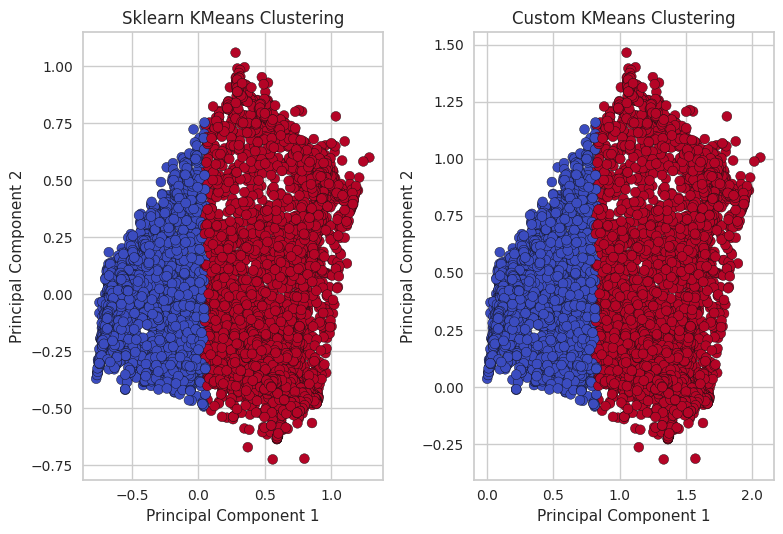

In [24]:
# Sklearn
plt.subplot(1, 2, 1)
plt.scatter(PCA_DF["PC1"], PCA_DF["PC2"], c=kmeans_pred, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Sklearn KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Custom
plt.subplot(1, 2, 2)
plt.scatter(customPCA_DF["PC1"], customPCA_DF["PC2"], c=customKmeans_pred, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Custom KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


## Sec 2: Silhouette Analysis **(P4-Sec2: 10 Points)**

**Silhouette Analysis** involves calculating and plotting the silhouette coefficients, which measure how similar each point is to its own cluster compared to other clusters. The closer these coefficients are to +1, the better the clustering.

Calculate the silhouette scores for each sample in the dataset using `silhouette_samples` and the average silhouette score using `silhouette_score`. Then, visualize these scores in a plot for each cluster for both results from the sklearn library and those from your custom clustering implementation.  **(P4-2-1: 10 points)**

In [25]:

from sklearn.metrics import silhouette_samples, silhouette_score

print("Sklearn implementation")
print("silhouette_score : ",silhouette_score(PCA_DF, kmeans_pred))
print("silhouette_samples : ",silhouette_samples(PCA_DF, kmeans_pred))
print("---------------------------------------------")
print("custom implementation")
print("silhouette_score : ",silhouette_score(customPCA_DF, customKmeans_pred))
print("silhouette_samples : ",silhouette_samples(customPCA_DF, customKmeans_pred))

Sklearn implementation
silhouette_score :  0.4282656750490327
silhouette_samples :  [0.6212852  0.63667439 0.13418422 ... 0.14754425 0.36548954 0.11442261]
---------------------------------------------
custom implementation
silhouette_score :  0.4282656750490234
silhouette_samples :  [0.6212852  0.63667439 0.13418422 ... 0.14754425 0.36548954 0.11442261]


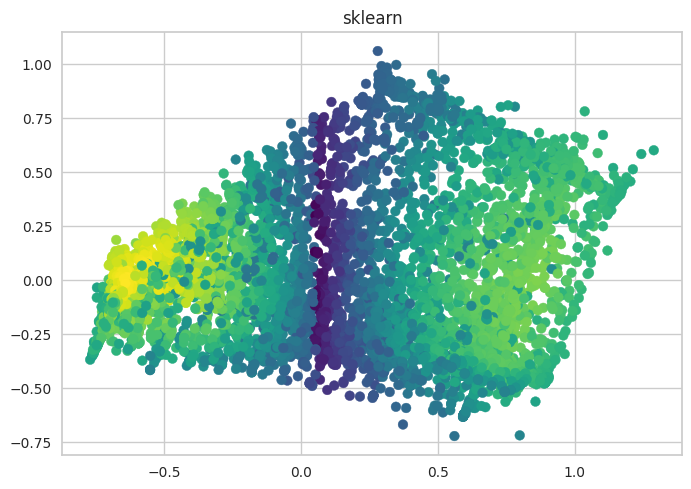

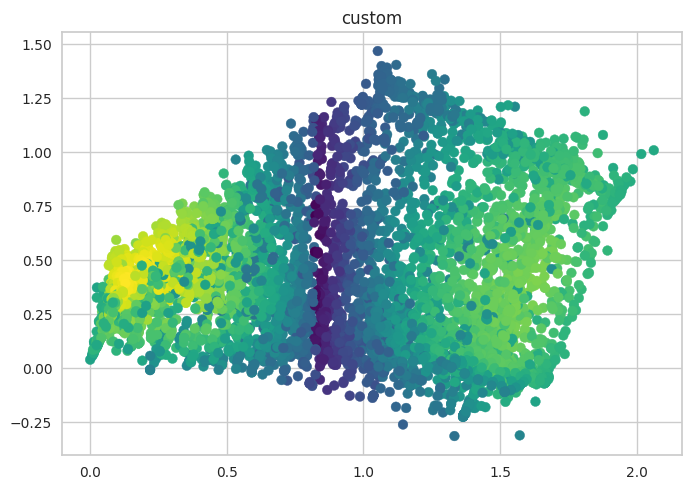

In [26]:
plt.scatter(PCA_DF["PC1"], PCA_DF["PC2"], c=silhouette_samples(PCA_DF, kmeans_pred),cmap='viridis')
plt.title('sklearn')
plt.show()
plt.scatter(customPCA_DF["PC1"], customPCA_DF["PC2"], c=silhouette_samples(customPCA_DF, customKmeans_pred),cmap='viridis')
plt.title('custom')
plt.show()